## MLP Implementation 
Covers questions 1 and 2 from the assignment. Below are the steps it covers 
1. Downloads dataset from torchvision.datasets
2. Pre-process all the input data and Normalise the data.
3. Splits train-dataset into training and validation sets
4. Train the models using train-dataset using forward and backward pass with different hyperparameters 
5. Evaluate the model using test data on all the trained models   

In [1]:
%reload_ext autoreload
from data_preparation import prepare_dataset_dict, pre_process_dataset
from mlp import  mlp_train, compare_training_and_validation_loss, mlp_test


In [4]:
dataset_dict = prepare_dataset_dict()

-------------------------TRAIN DATA---------------------------------
Available Training dataset contains 60,000 images.
Each image is of size 28x28
Each image is labelled one of: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Each image pixel values are between 0 and 255
---------------------------------------------------------------------
------------------------- TRAIN DATA After Split -----------------------
Final Training dataset shape: (52800, ',') images of 28x28
Final Validation dataset shape: (7200, ',') images of 28x28
---------------------------------------------------------------------
------------------------- TEST DATA ---------------------------------
Test dataset contains 10,000 images.
Each image is of size 28x28
Each image is labelled one of: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Each image pixel values are between 0 and 255
-----------------

In [5]:
processed_dataset_dict = pre_process_dataset(dataset_dict)

--------------------------- Train Data Processed-----------------------------------
Flattened `train` tensor from shape (52800, 28, 28) to (52800, 784)
Normalised `train` from (min,max) of (np.uint8(0), np.uint8(255)) to (np.float64(0.0), np.float64(1.0))
Added One hot encoded label arrays for `train`
--------------------------- Test Data Processed-----------------------------------
Flattened `test` tensor from shape (10000, 28, 28) to (10000, 784)
Normalised `test` from (min,max) of (np.uint8(0), np.uint8(255)) to (np.float64(0.0), np.float64(1.0))
Added One hot encoded label arrays for `test`
--------------------------- Val Data Processed-----------------------------------
Flattened `val` tensor from shape (7200, 28, 28) to (7200, 784)
Normalised `val` from (min,max) of (np.uint8(0), np.uint8(255)) to (np.float64(0.0), np.float64(1.0))
Added One hot encoded label arrays for `val`


In [8]:
# Training MLP using Relu activation with different Initialization functions, learning rate and hidden layers
%%capture --no-display
hidden_layers = [512, 256, 128, 64, 32, 16]
learning_rate = 0.1
epochs = 350
trained_dict_relu, mlp_model_relu = mlp_train(processed_dataset_dict, hidden_layers, learning_rate, epochs, activation_function="relu",  initialisation_function="He")

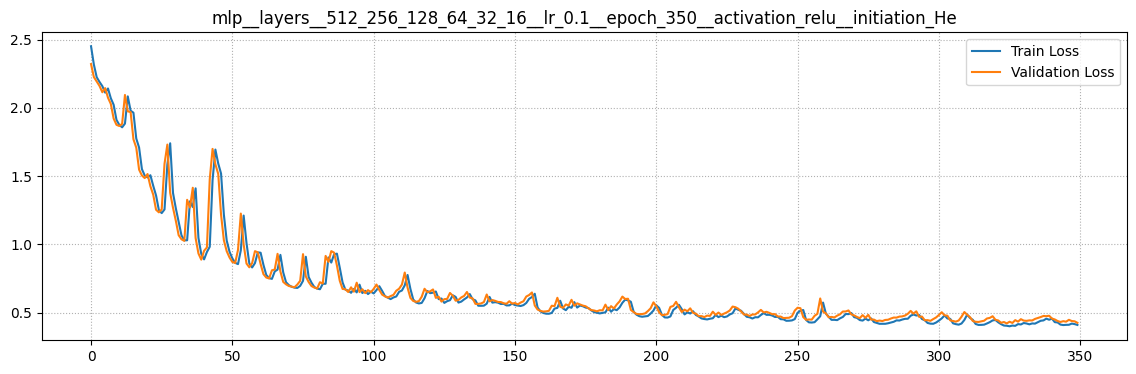

In [9]:
compare_training_and_validation_loss(trained_dict_relu)

In [10]:
%%capture --no-display
hidden_layers = [512, 128, 64, 32, 16]
learning_rate = 0.1
epochs = 350
trained_dict_relu2, mlp_model_relu2 = mlp_train(processed_dataset_dict, hidden_layers, learning_rate, epochs, activation_function="relu",  initialisation_function="He")

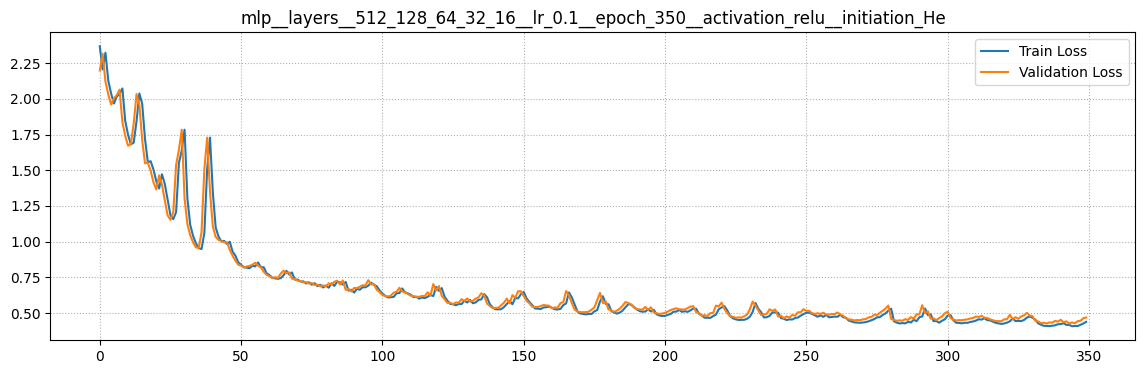

In [11]:
compare_training_and_validation_loss(trained_dict_relu2)

In [23]:
%%capture --no-display
hidden_layers = [512, 256, 128, 64, 32, 16]
learning_rate = 0.1
epochs = 100
trained_dict_tanh, mlp_model_tanh = mlp_train(processed_dataset_dict, hidden_layers, learning_rate, epochs, activation_function="tanh",  initialisation_function="He")

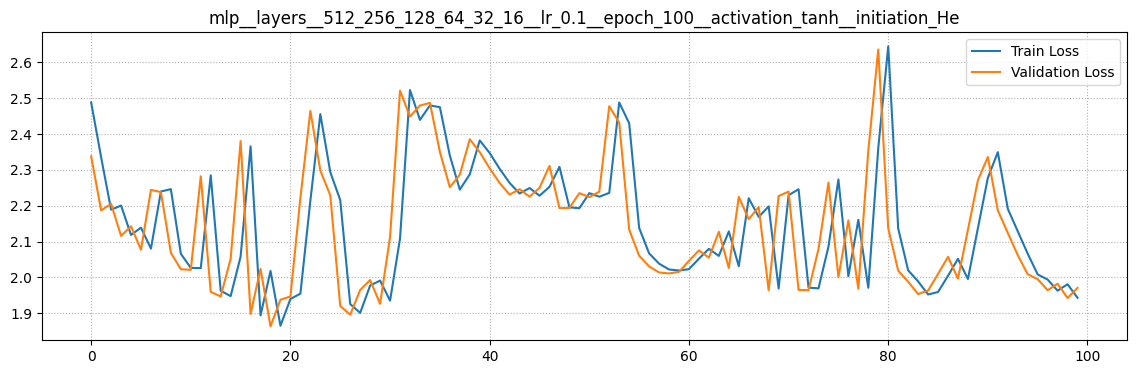

In [24]:
compare_training_and_validation_loss(trained_dict_tanh)

In [40]:
%%capture --no-display
hidden_layers = [512, 256, 128, 64, 32, 16]
learning_rate = 0.1
epochs = 350
trained_dict_xavier, mlp_model_xavier = mlp_train(processed_dataset_dict, hidden_layers, learning_rate, epochs, activation_function="relu", initialisation_function="Xavier")

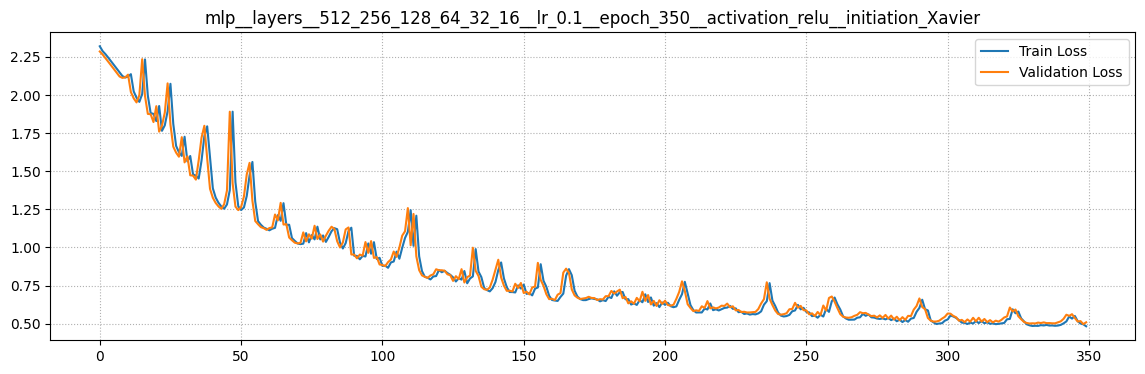

In [41]:
compare_training_and_validation_loss(trained_dict_xavier)

In [43]:
mlp_test(mlp_model_xavier, dataset_dict)

------------ Test Confusion Matrix ------------
[[782   2  27 112  10   2  46   0  18   1]
 [  0 955   8  31   4   0   0   0   2   0]
 [ 12   2 666  20 273   1  16   0  10   0]
 [ 24  14  14 891  44   2   7   0   4   0]
 [  0   1  70  43 868   0  10   0   8   0]
 [  0   0   0   1   0 895   0  71   4  29]
 [211   1 147  81 289   0 238   0  33   0]
 [  0   0   0   0   0  21   0 939   0  40]
 [  0   1  11   7   8   5   6   7 955   0]
 [  0   0   0   0   0   5   0  52   1 942]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.98      0.95      0.97      1000
           2       0.71      0.67      0.69      1000
           3       0.75      0.89      0.82      1000
           4       0.58      0.87      0.70      1000
           5       0.96      0.90      0.93      1000
           6       0

In [46]:
mlp_test(mlp_model_relu, dataset_dict)

------------ Test Confusion Matrix ------------
[[617   1  11  44  17   3 286   0  21   0]
 [  0 956   1  24  15   1   1   0   2   0]
 [  4   0 390   4 449   2 134   0  17   0]
 [ 12  10   6 766 147   2  48   0   9   0]
 [  0   0   9   1 899   0  79   0  12   0]
 [  0   0   0   1   0 933   0  40   8  18]
 [ 69   1  41  21 162   1 672   0  33   0]
 [  0   0   0   0   0  35   0 922   0  43]
 [  0   0   2   2   8   4   6   4 973   1]
 [  0   0   0   0   0  13   0  41   2 944]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1000
           1       0.99      0.96      0.97      1000
           2       0.85      0.39      0.53      1000
           3       0.89      0.77      0.82      1000
           4       0.53      0.90      0.67      1000
           5       0.94      0.93      0.94      1000
           6       0